<h1 style="text-align:center;">Dinámica de opiniones y polarización</h1>

<p style="text-align:right;padding-right:5em;">Joaquín Bardauil</p>
<br><br><br>
La polarización de opiniones en entornos sociales ha emergido como un fenómeno de creciente interés y preocupación en el panorama contemporáneo. En un mundo donde la información y las interacciones fluyen constantemente a través de plataformas digitales y medios de comunicación, la polarización puede ejercer un impacto profundo en la percepción pública, la toma de decisiones y la cohesión social. Resulta imperativo comprender los mecanismos subyacentes a este proceso, y es en esta búsqueda de conocimiento donde se justifica la incursión en un análisis filosófico de la polarización de opiniones. Más allá de su mero estudio empírico, examinar las raíces filosóficas de la polarización nos permite no solo discernir sus consecuencias prácticas, sino también evaluar sus implicaciones éticas y epistemológicas en la construcción del conocimiento humano y la formación de identidades individuales y colectivas.

Sin embargo, diseñar modelos que exhiban este fenómeno presenta desafíos importantes. En particular, en un modelo de dinámica de opiniones en donde los agentes actualizan sus opiniones a partir del promedio con todos los demás agentes, el resultado será que todos convergen a un punto medio. En otros casos, estos modelos pueden generar que las opiniones de los agentes converjan en los extremos. La dificultad en diseñar modelos de este tipo consiste en encontrar esos puntos de balance entre los extremos y la plena convergencia en donde se produce la polarización.

In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from computational_social_epistemology.opinion_dynamics import (
    # HK y extensiones
    BoundedConfidenceModel,
    AsymmetricBoundedConfidenceModel,
    DependentAsymmetryBoundedConfidenceModel,
    # Procesamiento en batch
    BatchSimulaciones,
    # DW y extensiones
    RelativeAgreementModel,
    RAModelExtremists
)
from computational_social_epistemology.metrics import (
    generate_polarization_report, 
    print_polarization_report
)

# Definiciones de polarización

Polarización se dice de muchas maneras. En {cite:p}`bramson2016`, {cite:p}`bramson2017` se presentan nueve sentidos alternativos de polarización, junto con definiciones formales que permiten implementarlo como métrica de análisis. Estos nueve sentidos de polarización se subdividen, a su vez, en dos grupos: el primero de ellos refiere a métricas que miden la polarización directamente de un perfil de opiniones $x = x_i, \dots, x_j$. Estas métricas resultan como primeras aproximaciones muy intuitivas, pero sin embargo en muchos casos pueden resultar incompletas. Un segundo grupo de métricas de polarización observa el perfil de opiniones y además considera los diferentes grupos formados dentro de la comunidad.

En el primer grupo de definiciones de polarización se encuentran apertura (*spread*), la dispersión (*dispersion*), la cobertura (*coverage*) y regionalización (*regionalization*).

En el segundo grupo de definiciones de polarización se encuentran distinción (*distinctness*), divergecia de grupos (*group divergence*), consenso de grupos (*group convergence*) y paridad de tamaños (*size parity*)

En {cite:p}`bramson2017`, además, se realiza un análisis de los principales modelos de polarización de la literatura en función de estas métricas. Lo que se observa es que los distintos modelos reflejan diversos aspectos de la polarización.

# Modelo de confianza acotada

Este modelo fue presentado en {cite:p}`hegselmann2002`, y ampliado en {cite:p}`hegselmann2005`. El insight principal que aporta es que cada agente no ajusta sus opiniones en función de las de todos los otros agentes, sino sólo a partir de los agentes que piensan como él.

La simulación tiene un parámetro $\epsilon$ que representa la **incertidumbre** de un agente.

La fórmulad del modelo es la siguiente

$$
x_i(t + 1) = \frac{1}{|I|}\sum_{j\in I}x_j (t)
$$

Para $t = 0, 1, \dots$, donde $I(i, x) = \{ 1 \leq j \leq n : |x_i - x_j| \leq \epsilon_i \}$, es decir, todos los $j$ tal que la diferencia de opiniones $x_i - x_j$ está en el intervalo $\left[ -\epsilon_i, +\epsilon_i \right]$.

Además, se admite un caso de límites asimétricos, donde el intervalo de confianza está dado por $\left[ -\epsilon_l, +\epsilon_r \right]$. En este caso, el conjunto de vecinos queda determinado por $I(i, x) = \left\{ 1 \leq j \leq n : -\epsilon_l \leq x_j - x_i \leq +\epsilon_r \right\}$

## Experimentos

Esta primera serie de experimentos incluye experimentos con una cota de confianza simétrica (*i.e.*, iguales valores de $\epsilon$ a izquierda y a derecha) y con corridas únicas. En estos primeros experimentos se analiza la transición desde un resultado de fragmentación (pluralidad) de opiniones, hacia una polarización (polaridad) hasta el consenso (conformidad) {cite:p}`hegselmann2002`

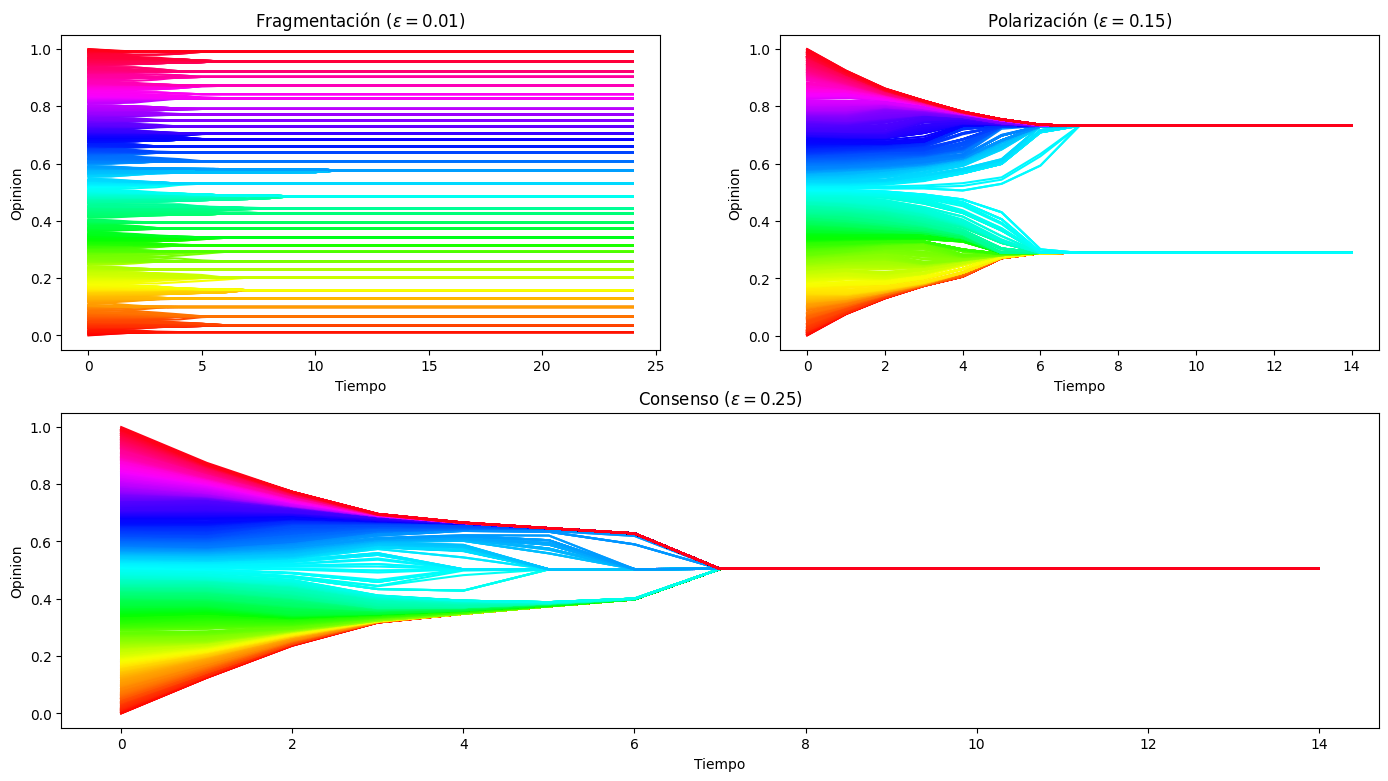

In [ ]:
experiments = {
    "Fragmentación ($\epsilon = 0.01$)": dict(
        n       = 1000,
        epsilon = 0.01,
        epochs  = 25
    ),
    "Polarización ($\epsilon = 0.15$)": dict(
        n       = 1000,
        epsilon = 0.15,
        epochs  = 25
    ),
    "Consenso ($\epsilon = 0.25$)": dict(
        n       = 1000,
        epsilon = 0.25,
        epochs  = 25
    )
}

fig = plt.figure(figsize=(17,9))
gs = fig.add_gridspec(2,2)
# set axes
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3]
executed_models = []

for idx, (name, params) in enumerate(experiments.items()):
    model = BoundedConfidenceModel(**params)
    # get ax for plotting
    ax = axs[idx]
    # disable progress bar
    model.v = False
    # run the experiment
    model.run()
    executed_models.append(model)
    # generate plot
    model.plot_results(ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Opinion")

### Fragmentación

Cuando $\epsilon$ es bajo -*i.e.*, cuando los agentes tienen una incertidumbre baja y actualizan sus opiniones sólo con agentes muy cercanos-, no se produce ningún fenómeno de agregación sino que se generan múltiples grupos aislados entre sí.

In [6]:
report = generate_polarization_report(executed_models[0])
print_polarization_report(report)


Polarization Analysis Report
+-------------------------+-----------+---------+----------+
| Metric                  |   Initial |   Final |   Change |
+=========================+===========+=========+==========+
| spread                  |     0.999 |   0.978 |   -0.021 |
+-------------------------+-----------+---------+----------+
| dispersion              |     0.248 |   0.248 |   -0     |
+-------------------------+-----------+---------+----------+
| coverage                |     1     |   1     |    0     |
+-------------------------+-----------+---------+----------+
| regionalization         |     0     |   0     |    0     |
+-------------------------+-----------+---------+----------+
| group_distinctness      |     0.755 |   0.756 |    0.001 |
+-------------------------+-----------+---------+----------+
| group_divergence        |     0.496 |   0.496 |   -0     |
+-------------------------+-----------+---------+----------+
| group_consensus         |     0.878 |   0.876 |   -0.

### Polarización

Cuando se aumenta la incertidumbre se produce la polarización de opiniones, *i.e.*, las opiniones de los agentes se unifican en dos modas.

In [7]:
report = generate_polarization_report(executed_models[1])
print_polarization_report(report)


Polarization Analysis Report
+-------------------------+-----------+---------+----------+
| Metric                  |   Initial |   Final |   Change |
+=========================+===========+=========+==========+
| spread                  |     0.998 |   0.443 |   -0.555 |
+-------------------------+-----------+---------+----------+
| dispersion              |     0.248 |   0.221 |   -0.027 |
+-------------------------+-----------+---------+----------+
| coverage                |     1     |   0.1   |   -0.9   |
+-------------------------+-----------+---------+----------+
| regionalization         |     0     |   1     |    1     |
+-------------------------+-----------+---------+----------+
| group_distinctness      |     0.75  |   1     |    0.25  |
+-------------------------+-----------+---------+----------+
| group_divergence        |     0.497 |   0.443 |   -0.054 |
+-------------------------+-----------+---------+----------+
| group_consensus         |     0.876 |   1     |    0.

### Consenso

Finalmente, a valores más altos de incertidumbre todos los agentes convergen a una opinión central. Esto se traduce como que los agentes ya están demasiado abiertos a actualizar su opinión con muchos otros agentes, por lo que toda la población tiende a un punto medio. Este es el resultado de consenso que se obtenía en los primeros modelos de De Groot (1974) y Lehrer (1975).

In [8]:
report = generate_polarization_report(executed_models[2])
print_polarization_report(report)


Polarization Analysis Report
+-------------------------+-----------+---------+----------+
| Metric                  |   Initial |   Final |   Change |
+=========================+===========+=========+==========+
| spread                  |     0.999 |   0     |   -0.999 |
+-------------------------+-----------+---------+----------+
| dispersion              |     0.248 |   0     |   -0.248 |
+-------------------------+-----------+---------+----------+
| coverage                |     1     |   0.05  |   -0.95  |
+-------------------------+-----------+---------+----------+
| regionalization         |     0     |   0     |    0     |
+-------------------------+-----------+---------+----------+
| group_distinctness      |     0.747 |   0     |   -0.747 |
+-------------------------+-----------+---------+----------+
| group_divergence        |     0.496 |   0     |   -0.496 |
+-------------------------+-----------+---------+----------+
| group_consensus         |     0.875 |   1     |    0.

## Análisis sistemático

Para obtener una mejor representación de los resultados, se corren simulaciones sistemáticamente para distintos valores de $\epsilon$. En particular, para cada elección de parámetros se corren múltiples simulaciones, se toma el perfil de opiniones final y se promedia el resultado para cada agente. Dicho de otra forma, las opiniones al final de la simulación son consideradas como un histograma con $n$ celdas. Esto se repite para múltiples valores de $\epsilon$, cubriendo todos los casos interesantes.

El resultado es una visualización en tres dimensiones, donde el eje $x$ representa el rango de opiniones de los agentes separado en las $n$ celdas del histograma; el eje $y$ representa los valores de $\epsilon$ explorados, y el eje $z$ expresa los valores de las opiniones de cada agente.

In [ ]:
reps = 5
bins = 100
num_epsilons = 40
min_epsilon, max_epsilon = .01, .4
epsilons = np.linspace(start = min_epsilon, 
                       stop  = max_epsilon, 
                       num   = num_epsilons)
models = [
    BoundedConfidenceModel(
        n        = 1000, 
        epsilon  = epsilon, 
        epochs   = 50
    )
    for epsilon in epsilons
    for _ in range(reps)
]

batch_simulaciones = BatchSimulaciones(
    models   = models, 
    epsilons = epsilons, 
    bins     = 100
)

batch_simulaciones.run_experiments()
batch_simulaciones.plot_results()

## Cota asimétrica

En {cite:p}`hegselmann2002` se consideran dos casos de cotas asimétricas.

En el primero de los casos, todos los agentes tienen los mismos valores para $\epsilon$, con $\epsilon_l \neq \epsilon_r$. Esto podría interpretarse como una situación en donde todos los agentes se ven más dispuestos a admitir opiniones más tendientes a alguno de los dos lados del espectro de opiniones. Puede interpretarse como una tendencia en toda la comunidad. Me imagino que igual esto no va a terminar generando un patrón de polarización sino de consenso en alguno de los dos extremos del espectro.

En el segundo de los casos, la asimetría entre las incertidumbres depende de la opinión que tiene el agente. De este modo, agentes con opiniones más cercanas a la derecha del espectro tendrán una cota más tirada al lado derecho, y viceversa. Creo que esta última es una buena representación de lo que sucede en un momento de polarización: los agentes más tirados hacia un costado del espectro de opiniones van a tener una tendencia mayor a considerar opiniones que estén en ese costado. Adicionalmente, creo que este fenómeno se completaría en la medida en que la incertidumbre y la asimetría también se actualicen en cada paso de la simulación. Eso se parece bastante al modelo de acuerdo relativo. De hecho creo que el caso en donde hay extremistas en la población es precisamente este. A chequear.

### Asimetría independiente de la opinión

En este caso, cada $\epsilon$ queda fijo a lo largo de toda la simulación

#### Experimentos

Los siguientes experimentos replican los mismos patrones ya reportados, con la diferencia que ahora la dinámica de los agentes tiende a agruparse más cerca del extremo superior de la distribución. Esto es resultado de utilizar un nivel mayor de incertidumbre del lado derecho del intervalo. La traducción de este parámetro es que los agentes tendrán mayor disposición a actualizar sus opiniones con otros agentes que estén más hacia su "derecha".

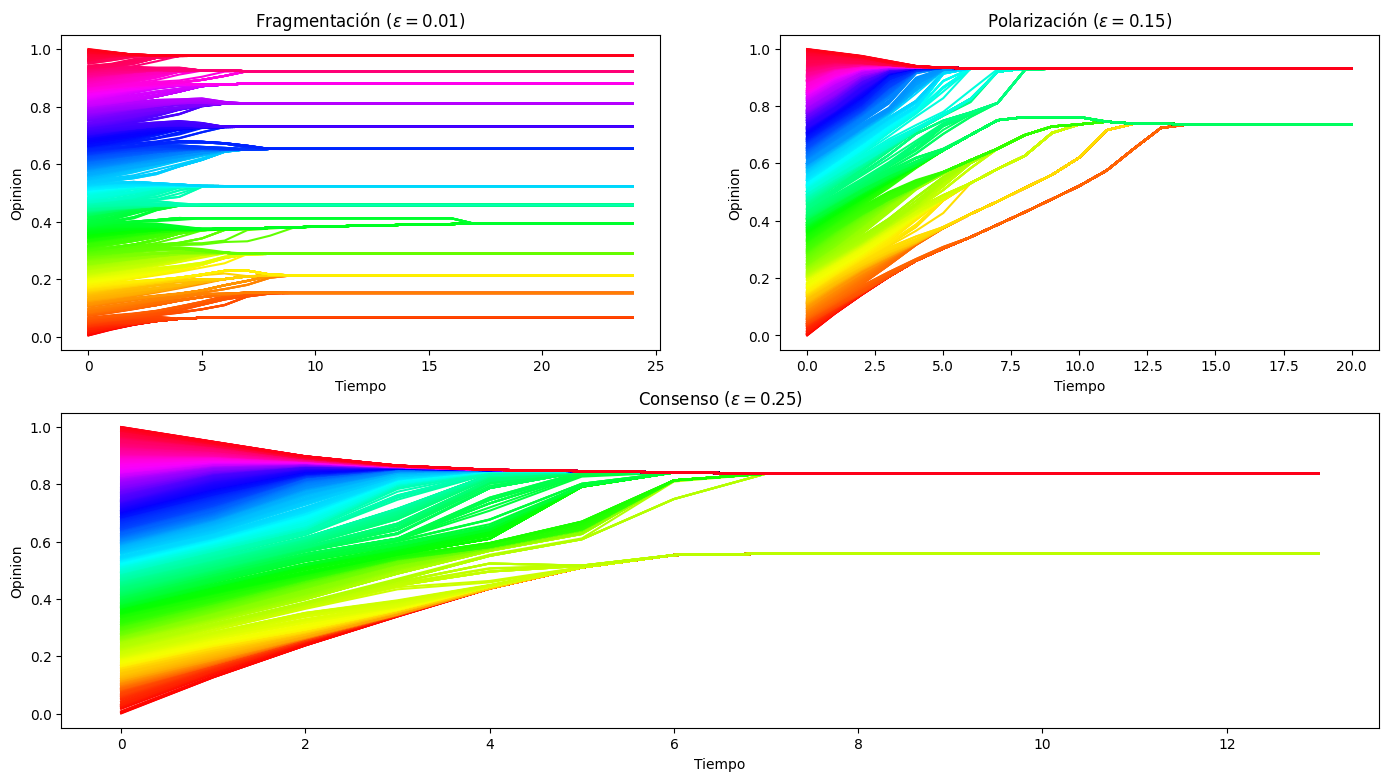

In [4]:
experiments = {
    "Fragmentación ($\epsilon = 0.01$)": dict(
        n       = 1000,
        epsilon = (0.02, 0.04),
        epochs  = 25
    ),
    "Polarización ($\epsilon = 0.15$)": dict(
        n       = 1000,
        epsilon = (0.03, 0.15),
        epochs  = 25
    ),
    "Consenso ($\epsilon = 0.25$)": dict(
        n       = 1000,
        epsilon = (0.10, 0.25),
        epochs  = 25
    )
}

fig = plt.figure(figsize=(17,9))
gs = fig.add_gridspec(2,2)
# set axes
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3]
executed_models = []

for idx, (name, params) in enumerate(experiments.items()):
    model = AsymmetricBoundedConfidenceModel(**params)
    # get ax for plotting
    ax = axs[idx]
    # disable progress bar
    model.v = False
    # run the experiment
    model.run()
    executed_models.append(model)
    # generate plot
    model.plot_results(ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Opinion")

### Asimetría dependiente de la opinión

En estos casos, la asimetría es una función de la opinión.

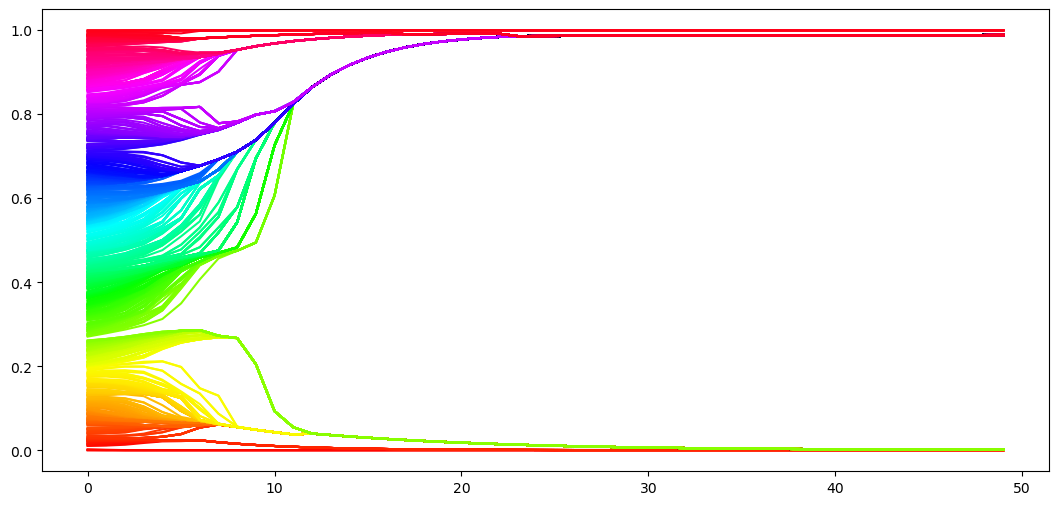

In [9]:
depdendent_asymm_polarization = DependentAsymmetryBoundedConfidenceModel(
    n        = 1000,
    strength = 1.,
    epochs   = 50
)

depdendent_asymm_polarization.run()
depdendent_asymm_polarization.plot_results()

---

# Relative agreement

Los modelos de relative agreement fueron propuestos en {cite:p}`deffuant2002` como una extensión del modelo de confianza acotada.

Estos modelos son similares a aquellos de confianza acotada en cuanto a que los vecinos con los que un agente actualiza su opinión son únicamente aquellos que piensen parecido a él, *i.e.*, es un modelo no lineal. Sin embargo, estos modelos tienen dos diferencias importantes.

La primera diferencia es que cada agente actualiza su opinión con respecto a otro agente, es decir, las interacciones son de a pares. Por el contrario, en el modelo de confianza acotada cada agente actualizaba su opinión a partir de las opiniones de todos los otros agentes que pensaran como él.

La segunda diferencia es que en el modelo de relative agreement la influencia que tenga un agente sobre otro va a depender del grado de superposición que haya entre las opiniones de cada uno y de cuánta confianza tenga cada agente. Esto queda explicado en la siguiente figura

![](../../images/ra_update.png)

El acuerdo relativo entre dos agentes es el resultado de tomar la superposición entre sus opiniones

$$
h_{ij} = min(x_i + u_i, x_j + u_j) - max (x_i - u_i, x_j - u_j)
$$
Y restarle el tamaño de la parte que no se superpone

$$
2u_i - h_{ij}
$$

De este modo, el acuerdo total entre dos agentes se expresa con la siguiente ecuación

$$
h_{ij} - (2u_i - h_{ij}) = 2(h_{ij} - ui)
$$

Una vez hecho ese cálculo, el acuerdo relativo entre dos agentes queda dado por

$$
2(h_{ij} - u_i) / 2u_i = (h_{ij} / u_i) -1
$$

De este modo, si $h_{ij} > u_i$, la actualización de $x_j$ y $u_j$ está dada por


\begin{align*}
x_j &:= x_j + \mu \left[ (h_{ij} / u_i) -1 \right] (x_i - x_j)\\
u_j &:= u_j + \mu \left[ (h_{ij} / u_i) -1 \right] (u_i - u_j)
\end{align*}

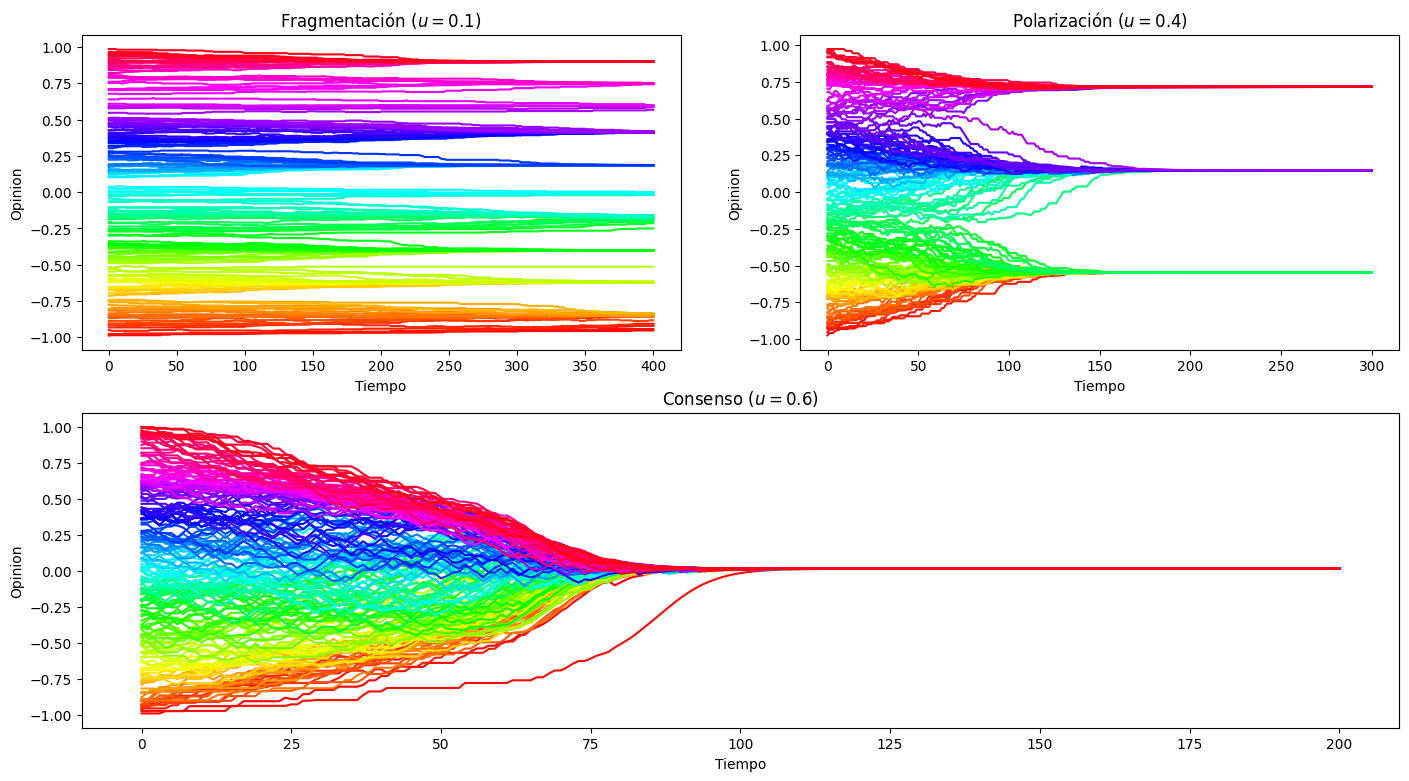

In [9]:
experiments = {
    "Fragmentación ($u = 0.1$)": dict(
        n           = 200,
        mu          = .2,
        uncertainty = .1,
        epochs      = 400
    ),
    "Polarización ($u = 0.4$)": dict(
        n           = 200,
        mu          = .2,
        uncertainty = .4,
        epochs      = 300
    ),
    "Consenso ($u = 0.6$)": dict(
        n           = 200,
        mu          = .2,
        uncertainty = .7,
        epochs      = 200
    )
}

fig = plt.figure(figsize=(17,9))
gs = fig.add_gridspec(2,2)
# set axes
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3]

for idx, (name, params) in enumerate(experiments.items()):
    model = RelativeAgreementModel(**params)
    # get ax for plotting
    ax = axs[idx]
    # disable progress bar
    model.v = False
    # run the experiment
    model.run()
    # generate plot
    model.plot_results(ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Opinion")

## Extremistas


Este modelo sólo extiende al anterior en cuanto a sus condiciones de inicialización: la distribución de incertidumbres ahora es dependiente de la opinión -o, dicho de otra forma, la incertidumbre es una función de la opinión.

### Convergencia central

En este caso, el poder de atracción de los extremistas no es lo suficientemente fuerte por lo que hay una convergencia en el centro.

100%|██████████| 300/300 [00:00<00:00, 562.40it/s]


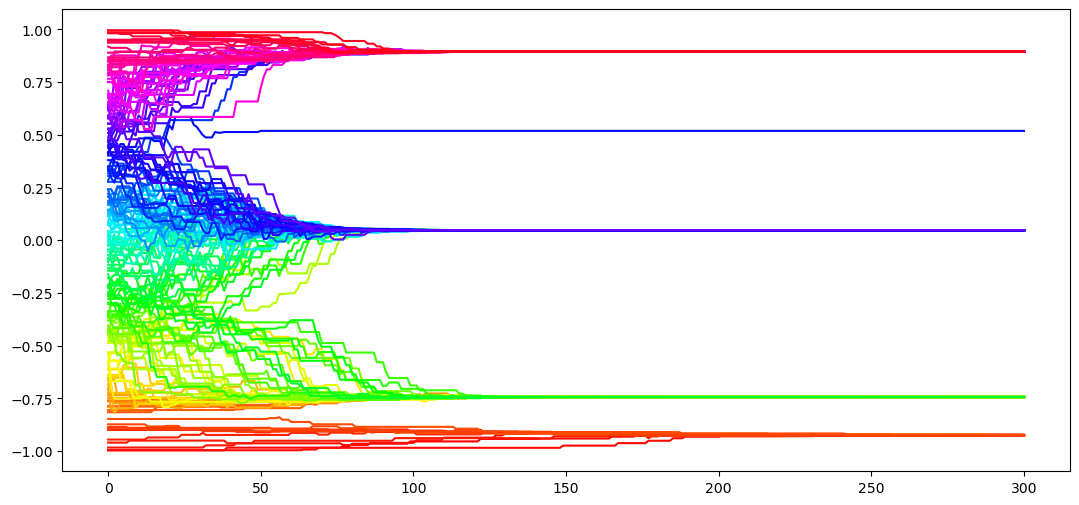

In [11]:
central_convergence = RAModelExtremists(
    n=200,
    mu=.5,
    uncertainty=.4,
    uncertainty_extremists = .1,
    delta=0,
    global_proportion=.2,
    epochs=300
)

central_convergence.run()
central_convergence.plot_results()

### Convergencia en los extremos

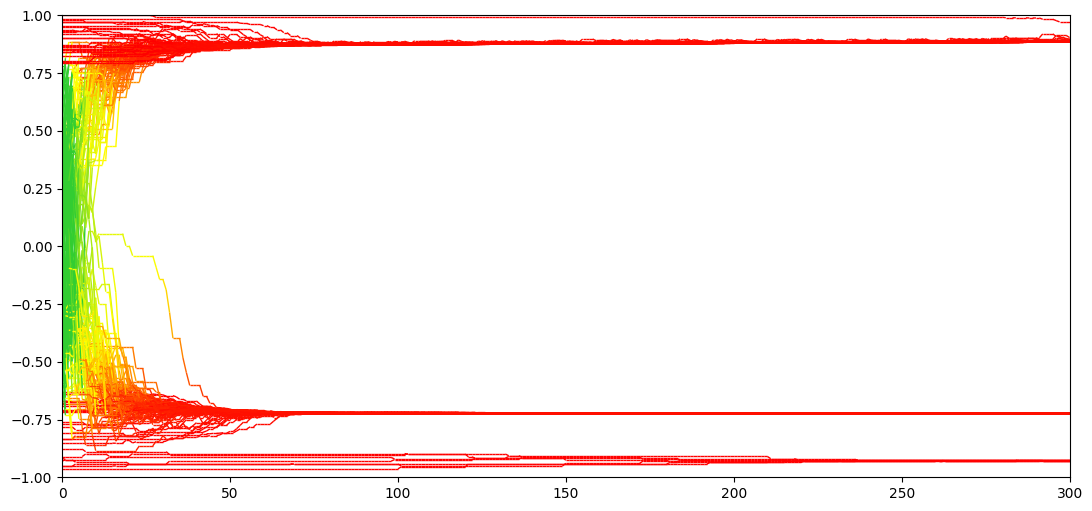

In [22]:
bipolarisation = RAModelExtremists(
    n=200,
    mu=.5,
    uncertainty=1.2,
    uncertainty_extremists = .1,
    delta=0,
    global_proportion=.25,
    epochs=300
)

bipolarisation.run()
bipolarisation.plot_results()

In [23]:
report = generate_polarization_report(bipolarisation)
print_polarization_report(report)


Polarization Analysis Report
+-------------------------+-----------+---------+----------+
| Metric                  |   Initial |   Final |   Change |
+=========================+===========+=========+==========+
| spread                  |     1.963 |   1.901 |   -0.062 |
+-------------------------+-----------+---------+----------+
| dispersion              |     0.484 |   0.807 |    0.322 |
+-------------------------+-----------+---------+----------+
| coverage                |     1     |   0.15  |   -0.85  |
+-------------------------+-----------+---------+----------+
| regionalization         |     0     |   1     |    1     |
+-------------------------+-----------+---------+----------+
| group_distinctness      |     0.762 |   1     |    0.238 |
+-------------------------+-----------+---------+----------+
| group_divergence        |     0.973 |   1.212 |    0.238 |
+-------------------------+-----------+---------+----------+
| group_consensus         |     0.882 |   0.999 |    0.

### Convergencia singular

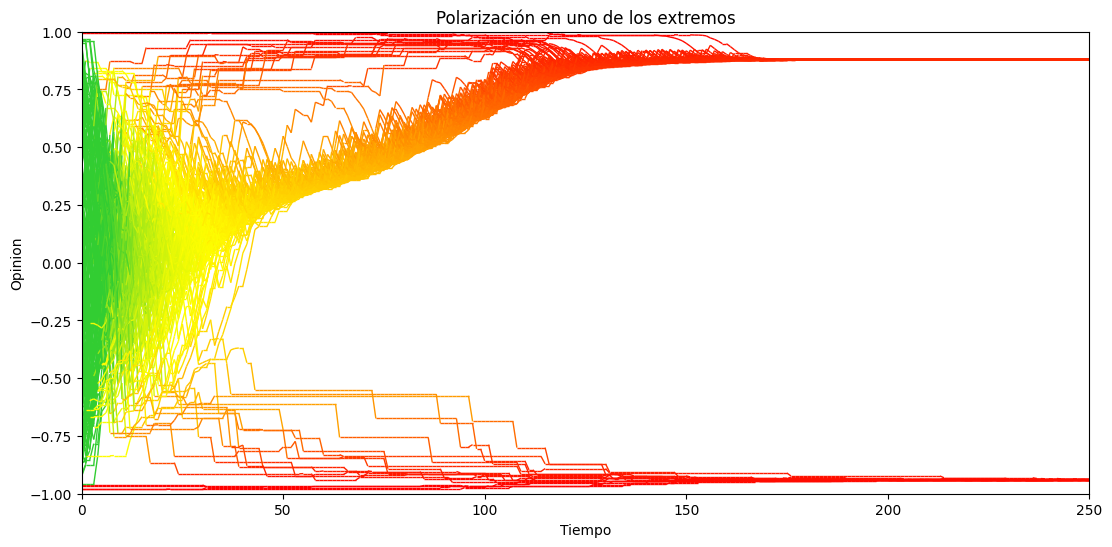

In [12]:
single_convergence = RAModelExtremists(
    global_proportion      = 0.04,
    uncertainty            = 1.4,
    mu                     = 0.5,
    delta                  = 0.0,
    uncertainty_extremists = 0.1,
    n                      = 200,
    epochs                 = 250
)

single_convergence.run()

fig, ax = plt.subplots(figsize=(13,6))
single_convergence.plot_results(ax=ax)
ax.set_title("Polarización en uno de los extremos")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Opinion")
plt.show()

In [14]:
report = generate_polarization_report(single_convergence)
print_polarization_report(report)


Polarization Analysis Report
+-------------------------+-----------+---------+----------+
| Metric                  |   Initial |   Final |   Change |
+=========================+===========+=========+==========+
| spread                  |     1.981 |   1.82  |   -0.161 |
+-------------------------+-----------+---------+----------+
| dispersion              |     0.501 |   0.283 |   -0.218 |
+-------------------------+-----------+---------+----------+
| coverage                |     1     |   0.1   |   -0.9   |
+-------------------------+-----------+---------+----------+
| regionalization         |     0     |   1     |    1     |
+-------------------------+-----------+---------+----------+
| group_distinctness      |     0.744 |   1     |    0.256 |
+-------------------------+-----------+---------+----------+
| group_divergence        |     1.002 |   1.818 |    0.816 |
+-------------------------+-----------+---------+----------+
| group_consensus         |     0.87  |   1     |    0.